<a href="https://colab.research.google.com/github/HedersonSantos/RegDatChallg/blob/main/regressao_saude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
from google.colab import files, drive
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [75]:
#obtendo os arquivos de dados
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
!wget https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv

--2022-04-05 20:44:58--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1397869 (1.3M) [text/plain]
Saving to: ‘train.csv.1’

train.csv.1         100%[===================>]   1.33M  --.-KB/s    in 0.02s   

2022-04-05 20:44:58 (63.7 MB/s) - ‘train.csv.1’ saved [1397869/1397869]

--2022-04-05 20:44:58--  https://raw.githubusercontent.com/HedersonSantos/RegDatChallg/main/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 573899 (560K) [text

In [76]:
# lendo o arquivo de treino
dfTrain = pd.read_csv('train.csv')
#dfTest = pd.read_csv('test.csv')
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      4141 non-null   int64  
 1   score   4141 non-null   float64
 2   V3      4141 non-null   float64
 3   V4      4141 non-null   float64
 4   V5      4141 non-null   float64
 5   V6      4141 non-null   float64
 6   V7      4141 non-null   float64
 7   V8      4141 non-null   float64
 8   V9      4141 non-null   float64
 9   V10     4141 non-null   float64
 10  V11     4141 non-null   float64
 11  V12     4141 non-null   float64
 12  V13     4141 non-null   float64
 13  V14     4141 non-null   float64
 14  V15     4141 non-null   float64
 15  V16     4141 non-null   float64
 16  V17     4141 non-null   float64
 17  V18     4141 non-null   float64
 18  V19     4141 non-null   float64
 19  V20     4141 non-null   float64
 20  V21     4141 non-null   float64
 21  V22     4141 non-null   float64
 22  

In [77]:
#estatística descritiva das variáveis
dfTrain.describe()

Id        score           V3           V4           V5  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean   2940.652499    29.121340     0.006104     0.000044     0.002964   
std    1699.192364    10.755535     0.005490     0.000035     0.003076   
min       1.000000     7.000000     0.000830     0.000002     0.000330   
25%    1475.000000    21.371000     0.003600     0.000023     0.001590   
50%    2946.000000    27.630000     0.004900     0.000035     0.002250   
75%    4415.000000    36.483000     0.006770     0.000053     0.003270   
max    5873.000000    54.992000     0.099990     0.000446     0.057540   

                V6           V7           V8           V9          V10  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean      0.003245     0.008893     0.034051     0.311054     0.017160   
std       0.003616     0.009229     0.025476     0.227168     0.013016   
min       0.000430     0.000980     0.003060     0.026000     0.001610   
25%       0.001830     0.004780     0.019260     0.177000     0.009310   
50%       0.002480     0.006760     0.027750     0.255000     0.013770   
75%       0.003430     0.009800     0.039990     0.366000     0.020690   
max       0.069560     0.172630     0.239150     1.970000     0.162670   

               V11          V12          V13          V14          V15  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean      0.020166     0.027513     0.051478     0.031895    21.691668   
std       0.016394     0.019818     0.039049     0.057913     4.283338   
min       0.001940     0.002490     0.004840     0.000286     1.659000   
25%       0.010820     0.015620     0.027930     0.011063    19.407000   
50%       0.016080     0.022960     0.041300     0.018663    21.915000   
75%       0.024000     0.032920     0.062070     0.031547    24.476000   
max       0.162460     0.275460     0.488020     0.748260    37.875000   

               V16          V17          V18          V19          V20  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean      0.541286     0.653501     0.219475     0.010223    -0.012633   
std       0.101635     0.070514     0.089927     1.022667     1.001635   
min       0.151020     0.514040     0.021983    -3.368797    -3.380800   
25%       0.469290     0.597100     0.157740    -0.695530    -0.686830   
50%       0.542300     0.645100     0.206200     0.012535    -0.016551   
75%       0.614110     0.710790     0.264070     0.706236     0.656291   
max       0.966080     0.865600     0.731730     4.051689     3.521048   

               V21          V22          V23          V24          V25  \
count  4141.000000  4141.000000  4141.000000  4141.000000  4141.000000   
mean     -0.025192    -0.000963     0.014772     0.008972    -0.007462   
std       1.000682     1.008123     0.989822     0.996655     0.988960   
min      -3.478111    -3.477503    -3.640632    -4.101566    -3.325202   
25%      -0.710558    -0.684078    -0.653262    -0.667845    -0.677333   
50%      -0.041247     0.010535     0.019838     0.012707    -0.014778   
75%       0.660537     0.662715     0.676001     0.678279     0.649582   
max       4.089038     3.415772     3.771027     3.904879     3.628111   

               V26          V27          V28          V29  
count  4141.000000  4141.000000  4141.000000  4141.000000  
mean     -0.016772    -0.000486    -0.005106    -0.018972  
std       1.026635     1.000286     0.990513     1.003466  
min      -4.181709    -3.271369    -3.914810    -3.940039  
25%      -0.710010    -0.684800    -0.667930    -0.719007  
50%      -0.022363    -0.017580    -0.020160    -0.018618  
75%       0.657142     0.643342     0.641950     0.659158  
max       4.551681     3.833876     3.459594     3.540049

In [78]:
#separando variáveis dependentes das variável alvo. Também dividindo a amostra em treino e teste.
preditoras = ['V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29']
X = dfTrain[preditoras].values
y = dfTrain['score'].values
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [79]:
# selecionando as variáveis pelo método KBest. Seleciona as variáveis com maior k score. (calcula o p-value de cada uma e retorna os menores p-value)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# feature selection
def select_features(X_treino, y_treino, X_teste):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from treinoing data
	fs.fit(X_treino, y_treino)
	# transform treino input data
	X_treino_fs = fs.transform(X_treino)
	# transform teste input data
	X_teste_fs = fs.transform(X_teste)
	return X_treino_fs, X_teste_fs, fs


Feature 0: 0.065821
Feature 1: 0.099634
Feature 2: 0.068066
Feature 3: 0.057231
Feature 4: 0.068432
Feature 5: 0.113721
Feature 6: 0.092640
Feature 7: 0.097183
Feature 8: 0.110006
Feature 9: 0.112299
Feature 10: 0.097437
Feature 11: 0.080524
Feature 12: 0.108348
Feature 13: 0.093686
Feature 14: 0.212920
Feature 15: 0.085965
Feature 16: 0.000056
Feature 17: 0.000000
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.016887
Feature 21: 0.002852
Feature 22: 0.000000
Feature 23: 0.013085
Feature 24: 0.000059
Feature 25: 0.015760
Feature 26: 0.000000


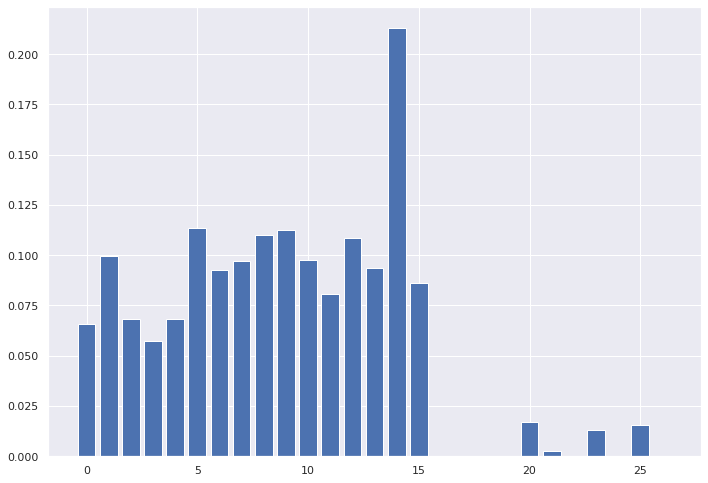

In [80]:
#chama a feature selection passando os datasets
X_treino_fs, X_teste_fs, fs = select_features(X_treino, y_treino, X_teste)

# what are scores for the features (lista o score de cada feature)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()


In [84]:
#pega as 15 variaveis mais importantes.
importantes = np.argpartition(fs.scores_, -4)[-15:]
n_preditoras = [preditoras[i]  for i in importantes ]#if preditoras[i] not in ['V8','V13','V10','V9']





In [85]:
def imprimeBoxPlot(dfTrain, n_preditoras:list, title=None):
  if title==None: title='Box Plot'
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(12, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    data = dfTrain[[c]]
    sns.boxplot(data=data, orient='h', ax=ax[j,k]).set_title(c + " - " + title)

def imprimeScatter(dados, n_preditoras, title=None):
  if title==None: title=' '
  fig, ax =plt.subplots(np.int64(np.ceil(len(n_preditoras)/3)),3, figsize=(20, 8))#, sharex=True
  j=0
  for i, c in enumerate(n_preditoras):
    j=j if (i%3!=0) | (i==0) else j+1
    k=i%3
    sns.scatterplot(data=dados, x='score', y=c, ax=ax[j,k]).set_title(c + " - " + title)


In [86]:
#filtrando outliers
dados = dfTrain.copy()
for c in n_preditoras:
  # selecionando segundo o total
  Q1 = dados[c].quantile(0.25)
  Q3 = dados[c].quantile(0.75)
  IQR = Q3 - Q1
  dados = dados[(dados[c] >= Q1 - (IQR*1.5)) & (dados[c] <= Q3 + (IQR*1.5))]
  

In [87]:
#correlação
display(dados[n_preditoras].corr('pearson'))
display(dados[n_preditoras].corr('spearman'))

V3       V10       V16       V18        V5       V14       V13  \
V3   1.000000  0.449707  0.384403  0.756410  0.922246  0.672980  0.449709   
V10  0.449707  1.000000  0.272292  0.415133  0.465275  0.445063  1.000000   
V16  0.384403  0.272292  1.000000  0.409501  0.261856  0.438593  0.272278   
V18  0.756410  0.415133  0.409501  1.000000  0.627128  0.567678  0.415127   
V5   0.922246  0.465275  0.261856  0.627128  1.000000  0.595526  0.465278   
V14  0.672980  0.445063  0.438593  0.567678  0.595526  1.000000  0.445058   
V13  0.449709  1.000000  0.272278  0.415127  0.465278  0.445058  1.000000   
V7   0.922259  0.465228  0.261796  0.627149  0.999995  0.595503  0.465230   
V9   0.518626  0.950117  0.317937  0.499368  0.481953  0.519341  0.950115   
V4   0.838723  0.405348  0.525374  0.689141  0.698701  0.589958  0.405347   
V15 -0.637861 -0.666141 -0.535104 -0.635731 -0.586916 -0.601176 -0.666140   
V11  0.460314  0.972502  0.306264  0.457978  0.441720  0.445544  0.972501   
V12  0.482155  0.862773  0.363973  0.523516  0.408504  0.436496  0.862768   
V8   0.493070  0.978284  0.332545  0.477089  0.470766  0.476131  0.978282   
V17  0.433707  0.201419  0.125409  0.389423  0.405613  0.037956  0.201420   

           V7        V9        V4       V15       V11       V12        V8  \
V3   0.922259  0.518626  0.838723 -0.637861  0.460314  0.482155  0.493070   
V10  0.465228  0.950117  0.405348 -0.666141  0.972502  0.862773  0.978284   
V16  0.261796  0.317937  0.525374 -0.535104  0.306264  0.363973  0.332545   
V18  0.627149  0.499368  0.689141 -0.635731  0.457978  0.523516  0.477089   
V5   0.999995  0.481953  0.698701 -0.586916  0.441720  0.408504  0.470766   
V14  0.595503  0.519341  0.589958 -0.601176  0.445544  0.436496  0.476131   
V13  0.465230  0.950115  0.405347 -0.666140  0.972501  0.862768  0.978282   
V7   1.000000  0.481941  0.698715 -0.586898  0.441695  0.408484  0.470735   
V9   0.481941  1.000000  0.467770 -0.669055  0.961461  0.922163  0.979425   
V4   0.698715  0.467770  1.000000 -0.639790  0.447602  0.481922  0.459464   
V15 -0.586898 -0.669055 -0.639790  1.000000 -0.684031 -0.674401 -0.689830   
V11  0.441695  0.961461  0.447602 -0.684031  1.000000  0.928441  0.986216   
V12  0.408484  0.922163  0.481922 -0.674401  0.928441  1.000000  0.935491   
V8   0.470735  0.979425  0.459464 -0.689830  0.986216  0.935491  1.000000   
V17  0.405675  0.205840  0.472880 -0.333976  0.242590  0.261014  0.231601   

          V17  
V3   0.433707  
V10  0.201419  
V16  0.125409  
V18  0.389423  
V5   0.405613  
V14  0.037956  
V13  0.201420  
V7   0.405675  
V9   0.205840  
V4   0.472880  
V15 -0.333976  
V11  0.242590  
V12  0.261014  
V8   0.231601  
V17  1.000000

V3       V10       V16       V18        V5       V14       V13  \
V3   1.000000  0.493499  0.387196  0.768035  0.927649  0.720612  0.493505   
V10  0.493499  1.000000  0.268711  0.454238  0.520787  0.467631  1.000000   
V16  0.387196  0.268711  1.000000  0.410476  0.260431  0.459496  0.268703   
V18  0.768035  0.454238  0.410476  1.000000  0.662927  0.604125  0.454239   
V5   0.927649  0.520787  0.260431  0.662927  1.000000  0.632805  0.520794   
V14  0.720612  0.467631  0.459496  0.604125  0.632805  1.000000  0.467639   
V13  0.493505  1.000000  0.268703  0.454239  0.520794  0.467639  1.000000   
V7   0.927642  0.520799  0.260357  0.662929  0.999993  0.632753  0.520806   
V9   0.558466  0.952205  0.315352  0.532360  0.537326  0.544516  0.952202   
V4   0.850123  0.449200  0.532949  0.702433  0.719191  0.636253  0.449199   
V15 -0.663950 -0.688863 -0.533398 -0.649429 -0.621889 -0.632679 -0.688868   
V11  0.502784  0.976762  0.305929  0.496166  0.500285  0.469526  0.976762   
V12  0.518026  0.881500  0.379721  0.554168  0.465190  0.470959  0.881498   
V8   0.534319  0.976710  0.332973  0.514731  0.524728  0.503263  0.976707   
V17  0.420790  0.220478  0.127928  0.377234  0.413416  0.062318  0.220463   

           V7        V9        V4       V15       V11       V12        V8  \
V3   0.927642  0.558466  0.850123 -0.663950  0.502784  0.518026  0.534319   
V10  0.520799  0.952205  0.449200 -0.688863  0.976762  0.881500  0.976710   
V16  0.260357  0.315352  0.532949 -0.533398  0.305929  0.379721  0.332973   
V18  0.662929  0.532360  0.702433 -0.649429  0.496166  0.554168  0.514731   
V5   0.999993  0.537326  0.719191 -0.621889  0.500285  0.465190  0.524728   
V14  0.632753  0.544516  0.636253 -0.632679  0.469526  0.470959  0.503263   
V13  0.520806  0.952202  0.449199 -0.688868  0.976762  0.881498  0.976707   
V7   1.000000  0.537361  0.719172 -0.621855  0.500315  0.465220  0.524756   
V9   0.537361  1.000000  0.511933 -0.688202  0.964488  0.931620  0.981702   
V4   0.719172  0.511933  1.000000 -0.669326  0.489161  0.532057  0.504395   
V15 -0.621855 -0.688202 -0.669326  1.000000 -0.706606 -0.703741 -0.710365   
V11  0.500315  0.964488  0.489161 -0.706606  1.000000  0.941139  0.987331   
V12  0.465220  0.931620  0.532057 -0.703741  0.941139  1.000000  0.948350   
V8   0.524756  0.981702  0.504395 -0.710365  0.987331  0.948350  1.000000   
V17  0.413458  0.218335  0.483064 -0.329667  0.251978  0.268509  0.244484   

          V17  
V3   0.420790  
V10  0.220478  
V16  0.127928  
V18  0.377234  
V5   0.413416  
V14  0.062318  
V13  0.220463  
V7   0.413458  
V9   0.218335  
V4   0.483064  
V15 -0.329667  
V11  0.251978  
V12  0.268509  
V8   0.244484  
V17  1.000000

In [88]:
dados_corr = dados[n_preditoras].corr('pearson')
retirar=[]
analisada = []
for c in dados_corr.columns:
  res = dados_corr[dados_corr[c]>=0.9]
  sai=[]
  for i in res.index.to_list():
    if i in retirar: break
    if i!=c: sai.append(c)
  if len(sai)>0:
    retirar.append(c)

In [89]:
n_preditoras = [c for c in n_preditoras if not c in retirar]

In [90]:
n_preditoras

['V16', 'V18', 'V5', 'V14', 'V13', 'V7', 'V9', 'V4', 'V15', 'V11', 'V8', 'V17']

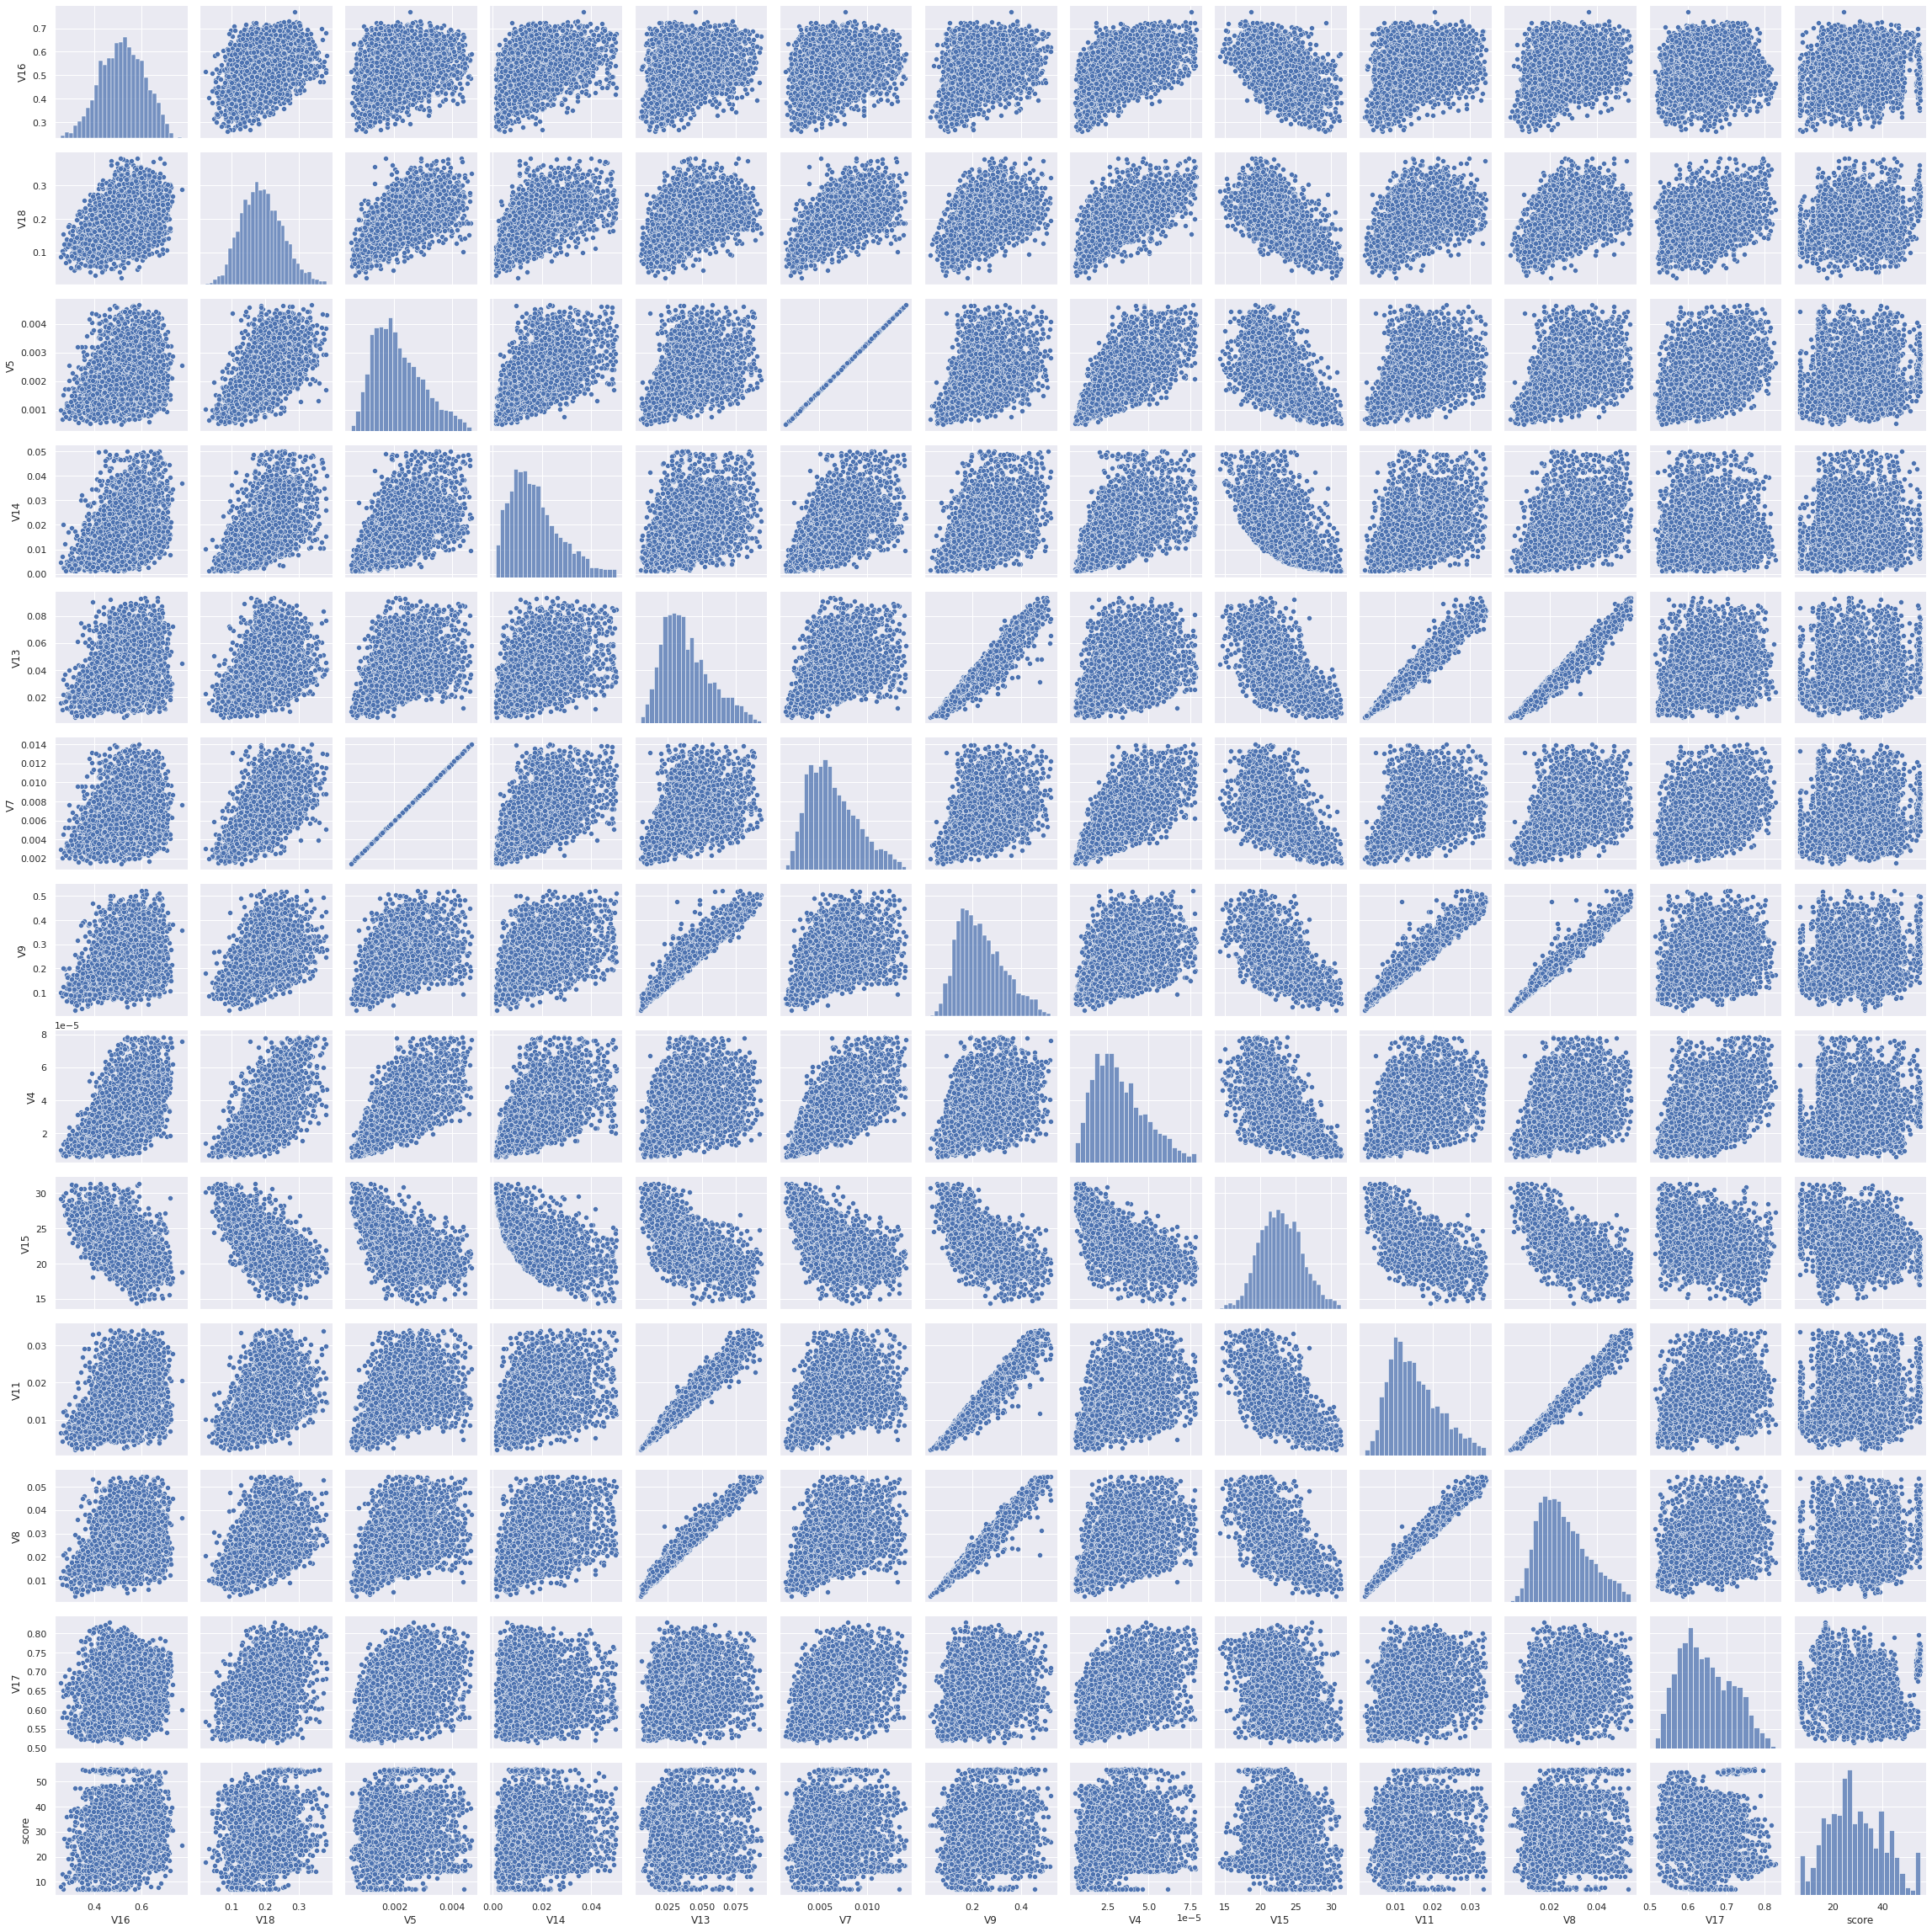

In [91]:
sns.pairplot(dados[(','.join(n_preditoras) + ',score').split(',')])
plt.show()

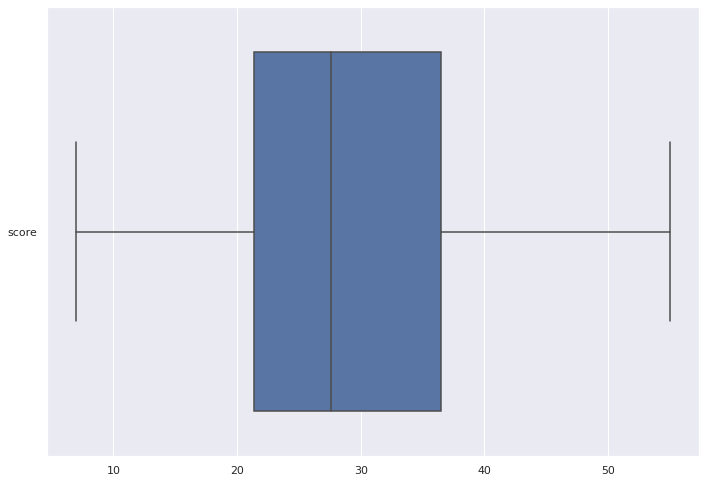

In [92]:
sns.boxplot(data=dfTrain[['score']], orient='h')


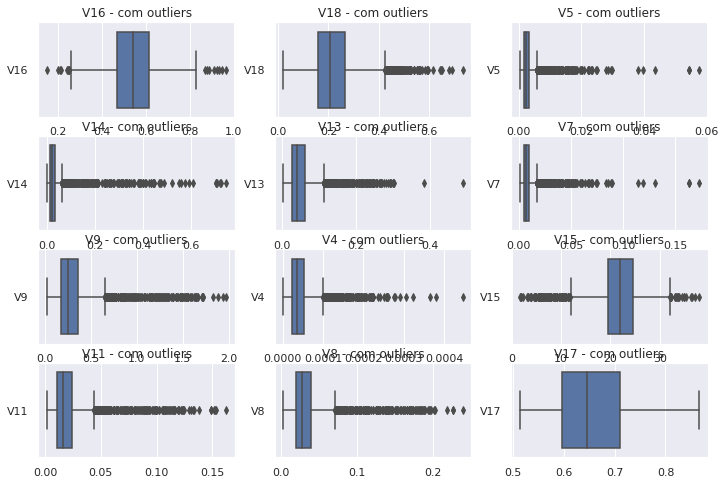

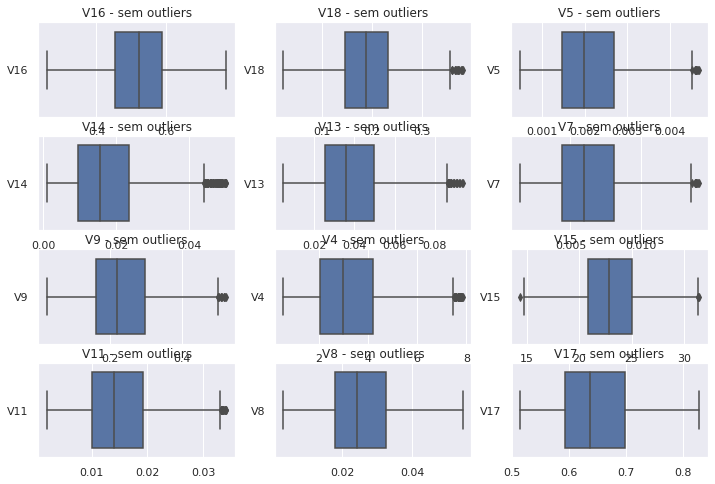

In [93]:
#box plot antes dos outliers
imprimeBoxPlot(dfTrain, n_preditoras, 'com outliers')
#box plot sem os outliers
imprimeBoxPlot(dados, n_preditoras, 'sem outliers')

In [94]:
n_preditoras

['V16', 'V18', 'V5', 'V14', 'V13', 'V7', 'V9', 'V4', 'V15', 'V11', 'V8', 'V17']

(3201, 2)


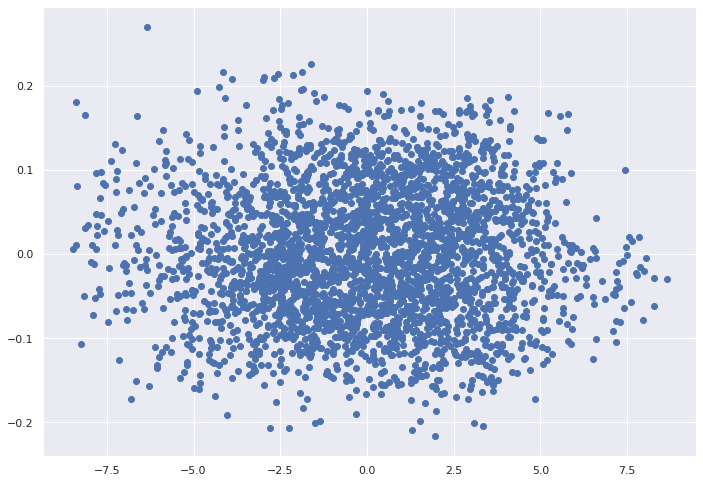

In [95]:
from sklearn.decomposition import PCA
###########
# projecting data in 2D
###########
X = dados[n_preditoras]
pca_proj=PCA(n_components=2)
data_2d=pca_proj.fit_transform(X)
print(data_2d.shape)

plt.scatter(data_2d[:,0],data_2d[:,1])


In [96]:
X = dados[n_preditoras]
y = dados['score'].map(lambda x: np.log(x+ 0.01))
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state = 123)

In [97]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

linreg = LinearRegression()
linreg.fit(X_treino, y_treino)
y_pred_linreg = linreg.predict(X_teste)
r2_linreg = r2_score(y_teste, y_pred_linreg)
print('R2:',r2_linreg)
mse_linreg = mean_squared_error(y_teste, y_pred_linreg)
print('MSE:',mse_linreg)


R2: 0.13903157866095728
MSE: 0.1545831662143971


In [98]:
from sklearn.preprocessing import PolynomialFeatures

# define a transformação nos dados
transformer = PolynomialFeatures(degree=3, include_bias=False)
#x = X_treino.reshape((-1, 1))
transformer.fit(X_treino)
#print('Dados originais:\n', X_treino)

# transforma os dados incluindo uma nova coluna com valores quadráticos
x_ = transformer.transform(X_treino)
x_t = transformer.transform(X_teste)
#print('Novos dados:\n', x_[0:1])

In [99]:
model = LinearRegression().fit(x_, y_treino)
y_pred = model.predict(x_)

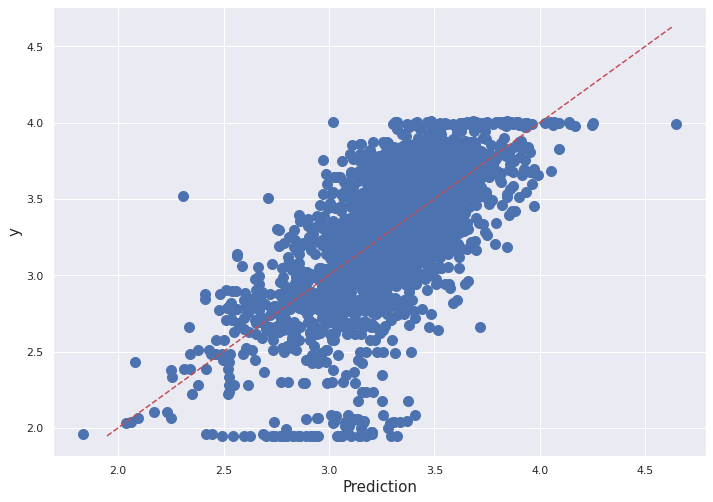

In [100]:
import matplotlib.pyplot as plt

fig = plt.figure()
l = plt.plot(y_pred, y_treino, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')

plt.ylabel("y", fontsize=15)
plt.xlabel("Prediction", fontsize=15)

# mostra a reta diagonal, que representa a predição perfeita
xl = np.arange(min(y_treino), 1.2*max(y_treino),(max(y_treino)-min(y_treino))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show(True)

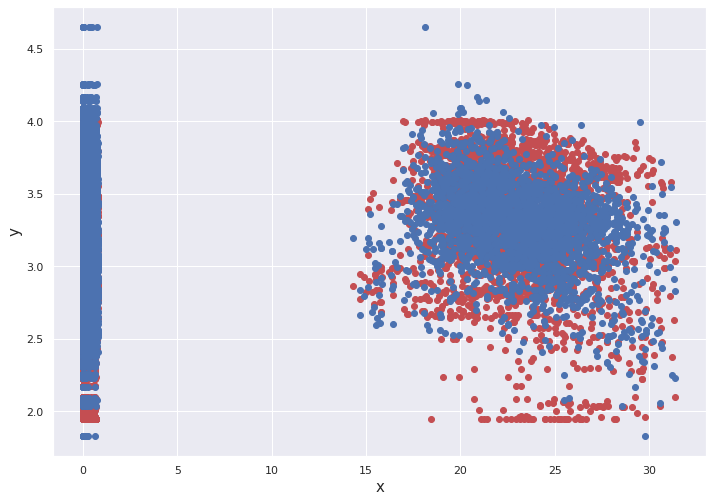

In [101]:
plt.plot(X_treino,y_treino, 'ro', label='Dados originais')
plt.plot(X_treino,y_pred, 'bo', label = 'Dados preditos')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
#plt.legend()
plt.show(True)

In [102]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_t)
R2 = r2_score(y_teste, y_pred)
print('R2:', R2)
MSE = mean_squared_error(y_teste, y_pred)
print('MSE:', MSE)


R2: 0.23000318993104318
MSE: 0.1382496058221543


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

vscore = []
vn = []
vr2=[]
for n in range(1,100,10):
    model = RandomForestRegressor(n_estimators=n, random_state= 12)
    model.fit(x_,y_treino)
    y_pred = model.predict(x_t) 
    score = mean_squared_error(y_pred, y_teste)
    mae = mean_absolute_error(y_pred, y_teste)
    print('Number of Estimators:', n, 'mse:', score)
    vscore.append(score)
    vn.append(n)
    vr2.append(mae)
best_n = vn[np.argmin(vscore)]
print('Melhor n:', best_n, ' com mse:', vscore[np.argmin(vscore)] )
plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.show()
plt.figure(figsize=(10,5))
plt.plot(vn, vr2, '-bo')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.show()

Number of Estimators: 1 mse: 0.2817466810916243
Number of Estimators: 11 mse: 0.12932637823626922
Number of Estimators: 21 mse: 0.12560870154773626
Number of Estimators: 31 mse: 0.12270402841851766
Number of Estimators: 41 mse: 0.12187016731824009
Number of Estimators: 51 mse: 0.12310639029172658


In [ ]:
model = RandomForestRegressor(n_estimators=best_n, random_state=12)
model.fit(x_,y_treino)
y_pred = model.predict(x_t) 
mse = mean_squared_error(y_pred, y_teste)
mae = mean_absolute_error(y_pred, y_teste)
#r2 = r2_score(y_pred, y_teste)
mse, mae 


In [ ]:
pred = pd.DataFrame(y_pred, columns=['predito']).reset_index()
y = pd.DataFrame(y_teste).reset_index().drop(columns='index').reset_index()
res = pd.merge(pred, y, on='index', how='inner')
res.head(10)

In [ ]:
dfTest = pd.read_csv('test.csv')
X_teste = dfTest[n_preditoras]
x_teste = transformer.transform(X_teste)
y_pred = model.predict(x_teste) 

In [ ]:
dfRes = pd.DataFrame()
dfRes['Id'] = dfTest['Id']
dfRes['Expected'] = np.exp(y_pred-0.01)

In [ ]:
dfRes.to_csv('hed_result.csv', index=False)

In [ ]:
!head hed_result.csv 